In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV, train_test_split, KFold, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, r2_score
from sklearn.tree import plot_tree, export_graphviz
import graphviz
from sklearn.decomposition import PCA
import pickle

In [98]:
df = pd.read_csv("china.csv")
df

,AFP,Input,Output,Enquiry,File,Interface,Added,Changed,Deleted,Resource,Duration,DevType,AdjFactor,Effort
0,1587,774,260,340,128,0,1502,0,0,4,4.0,NewDev,1.056591,7490
1,260,9,4,3,193,41,51,138,61,2,17.0,Maint,1.040000,4150
2,152,25,33,28,42,35,163,0,0,1,9.0,NewDev,0.932515,668
3,252,151,28,8,39,0,69,153,4,1,4.0,Maint,1.115044,3238
4,292,93,0,194,20,0,0,307,0,1,13.0,Maint,0.951140,2994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,51,32,0,16,7,0,0,55,0,1,3.0,Maint,0.927273,899
495,1106,410,267,108,152,25,962,0,0,2,20.0,NewDev,1.149688,16560
496,99,13,32,3,42,5,95,0,0,1,4.0,NewDev,1.042105,526
497,56,24,0,9,14,0,47,0,0,2,6.0,NewDev,1.191489,440


In [99]:
df.describe()

,AFP,Input,Output,Enquiry,File,Interface,Added,Changed,Deleted,Resource,Duration,AdjFactor,Effort
count,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000
mean,486.857715,167.098196,113.601202,61.601202,91.234469,24.234469,360.354709,85.062124,12.352705,1.458918,8.719238,1.017885,3921.048096
std,1059.171436,486.338575,221.274374,105.422840,210.270984,85.040996,829.842333,290.857039,124.224130,0.823729,7.347058,0.100899,6480.855600
min,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.648148,26.000000
25%,100.500000,27.000000,13.000000,6.000000,14.000000,0.000000,38.000000,0.000000,0.000000,1.000000,4.000000,0.960371,703.500000
50%,215.000000,63.000000,42.000000,24.000000,36.000000,0.000000,135.000000,4.000000,0.000000,1.000000,7.000000,1.013889,1829.000000
75%,437.500000,152.500000,112.000000,68.500000,84.000000,20.000000,325.500000,87.000000,0.000000,2.000000,11.000000,1.071083,3826.500000
max,17518.000000,9404.000000,2455.000000,952.000000,2955.000000,1572.000000,13580.000000,5193.000000,2657.000000,4.000000,84.000000,1.718923,54620.000000


<Figure size 720x720 with 0 Axes>

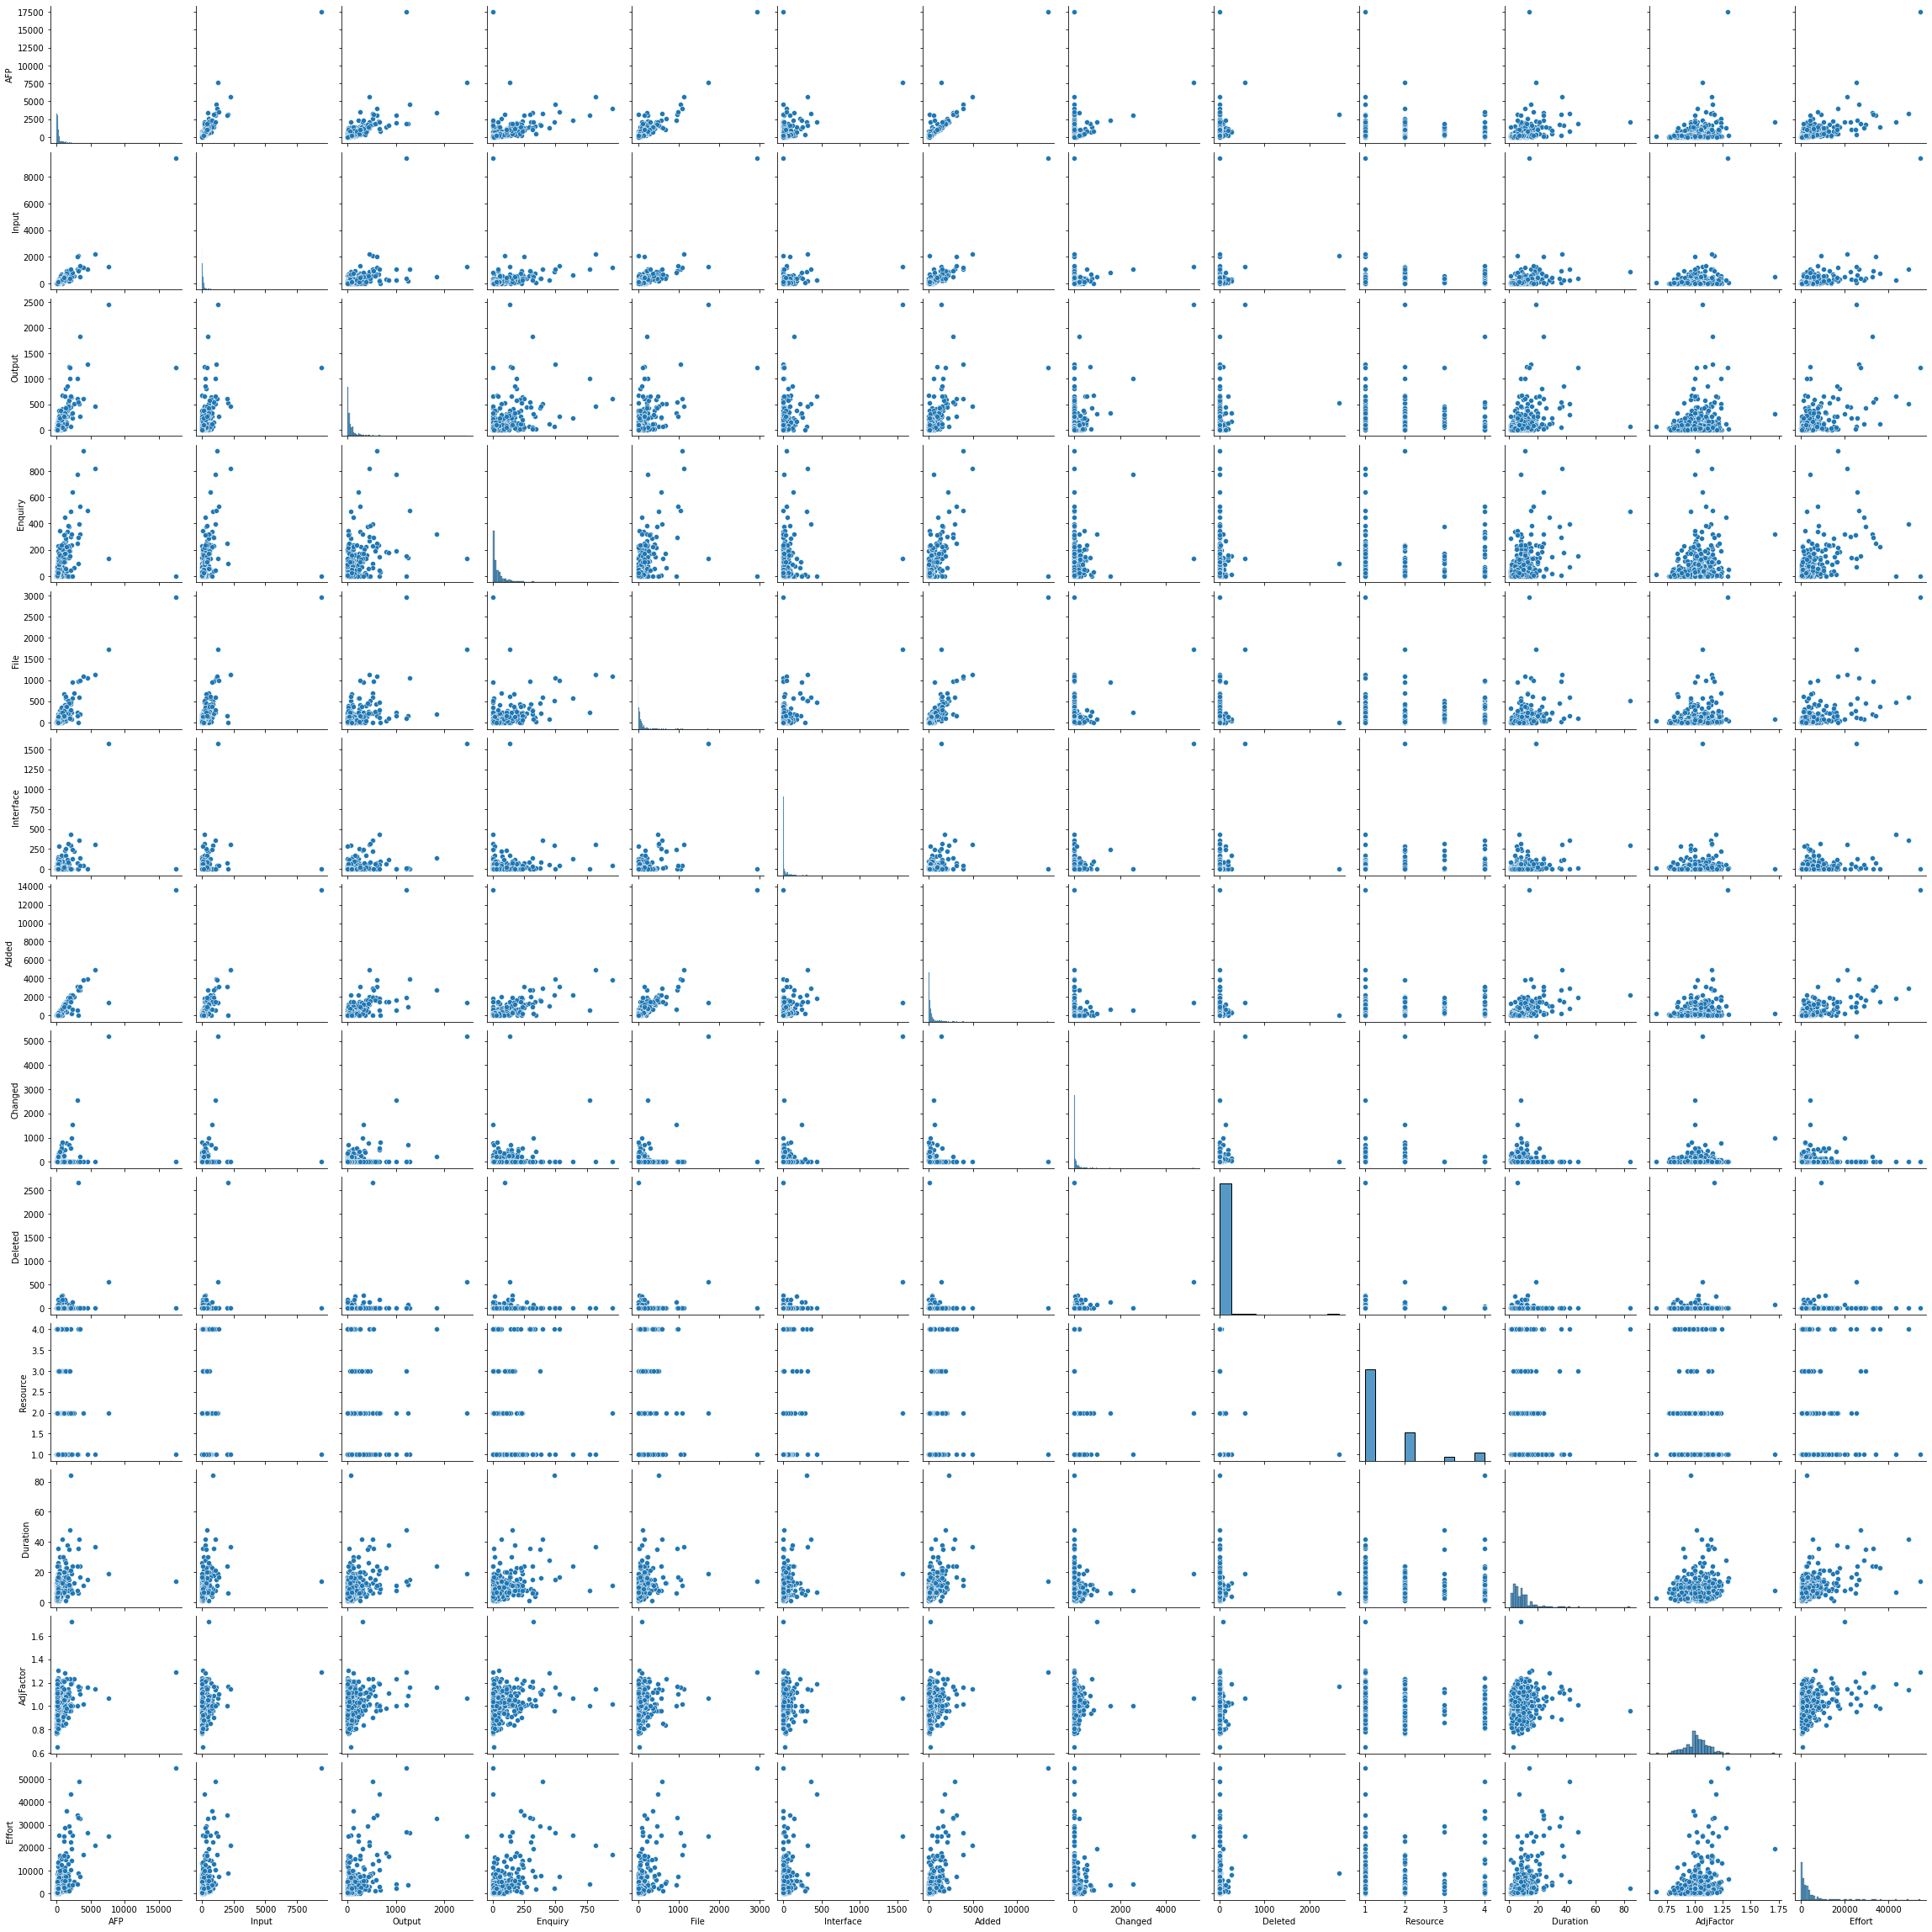

In [100]:
plt.figure(figsize=(10,10))
sns.pairplot(df)
plt.show()

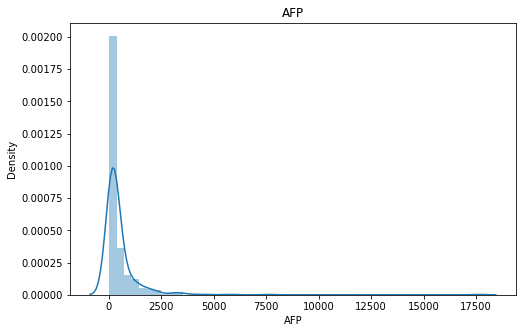

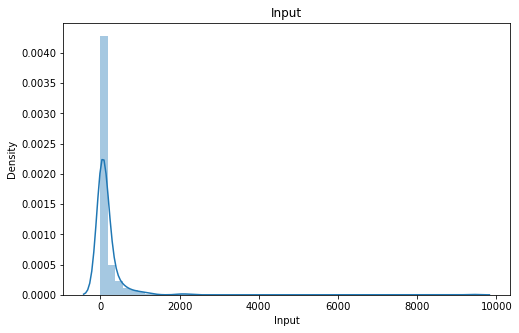

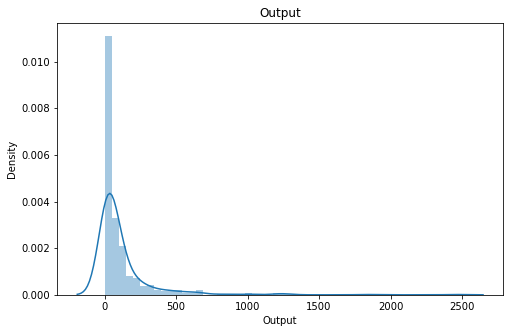

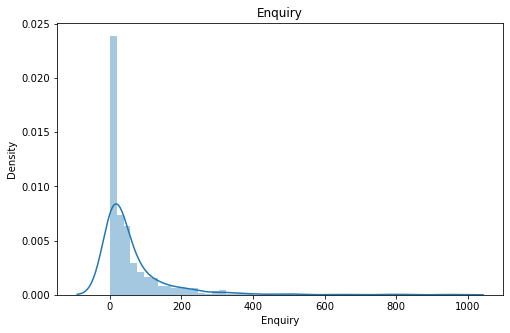

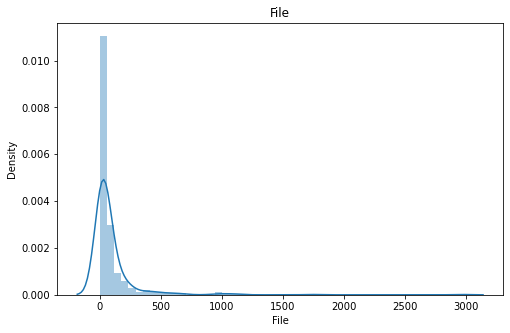

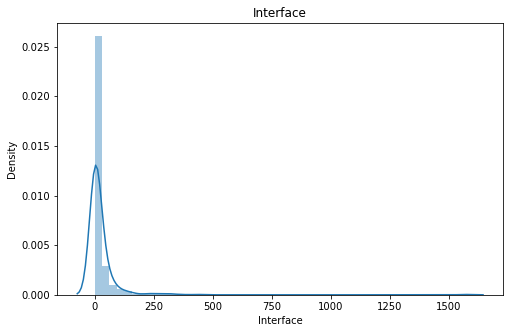

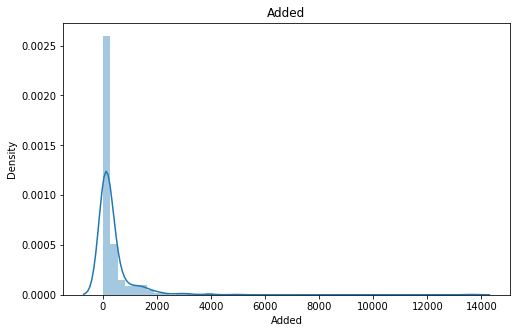

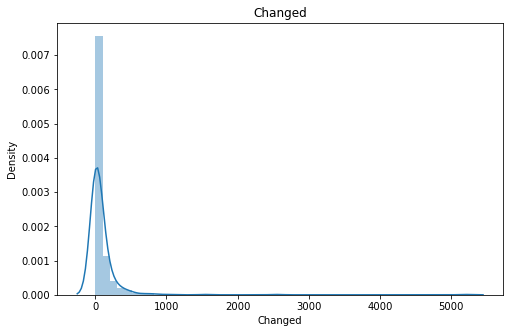

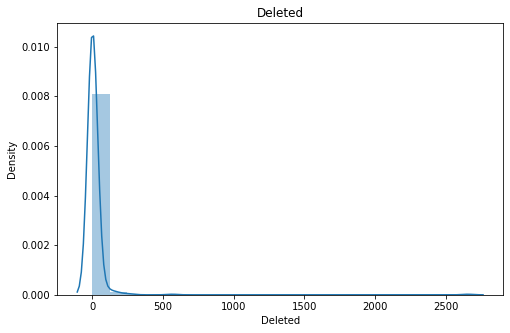

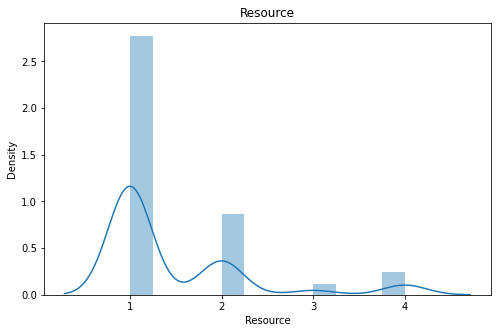

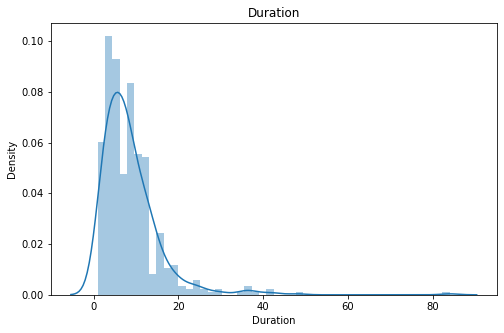

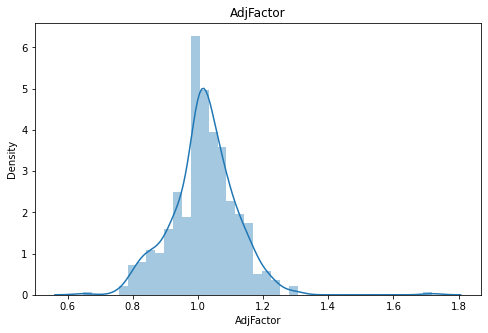

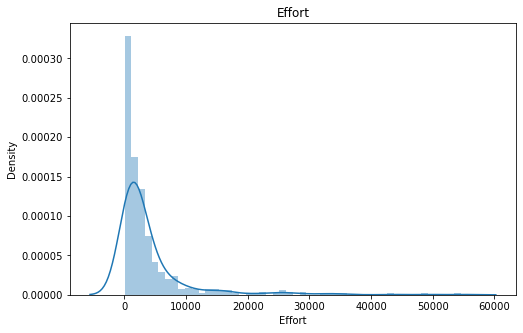

In [101]:
for i in df.columns:
    if df[i].dtypes!="object":
        warnings.filterwarnings("ignore")
        plt.figure(figsize=(8,5))
        plt.title(i)
        sns.distplot(df[i])
        plt.show()

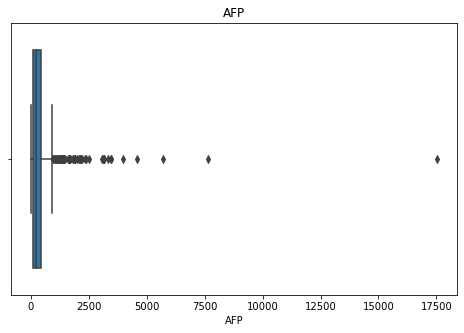

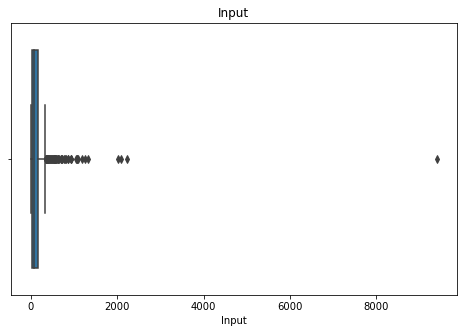

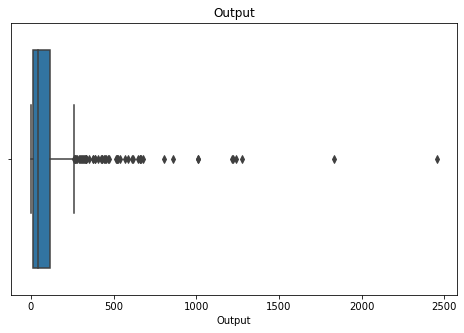

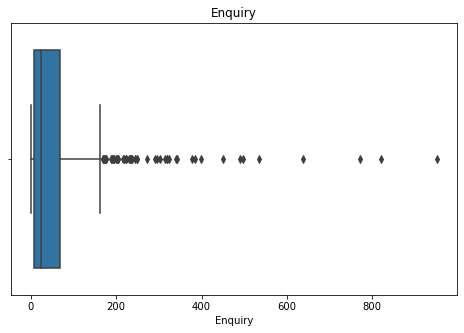

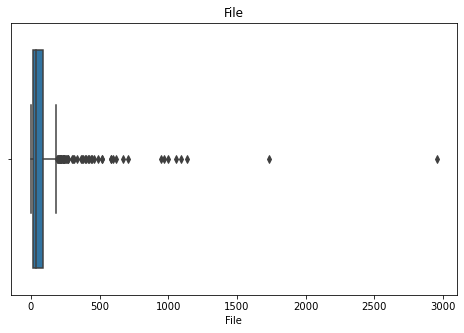

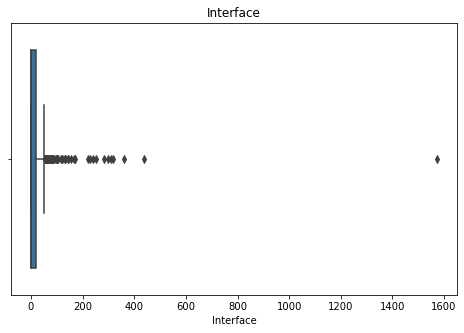

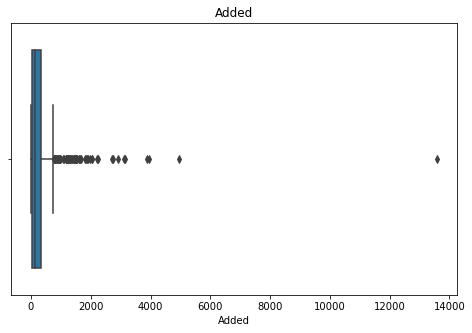

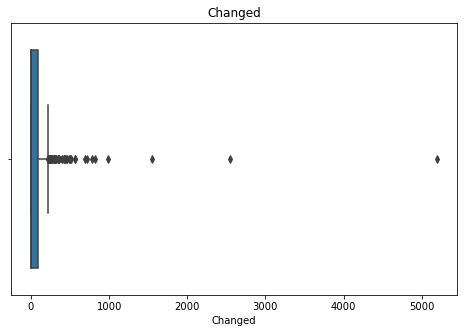

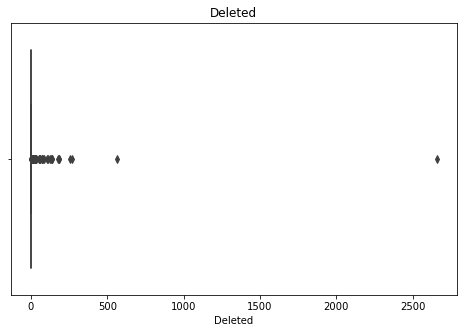

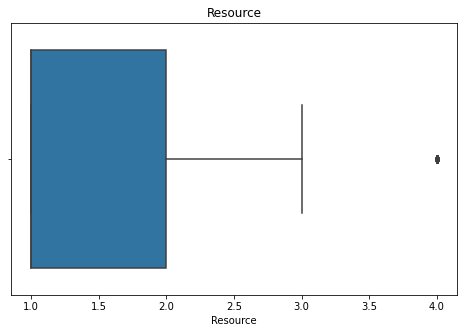

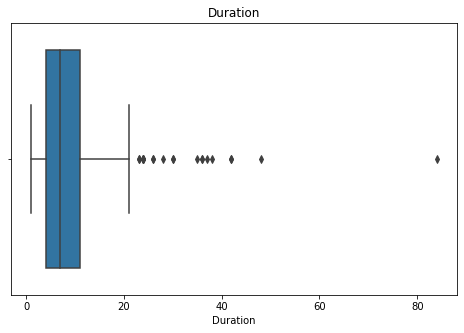

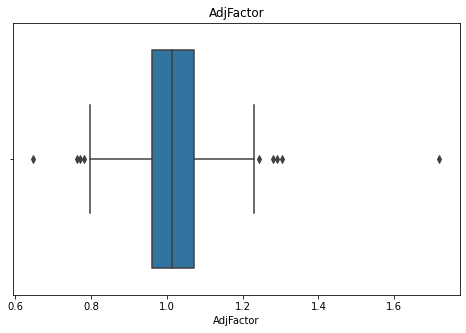

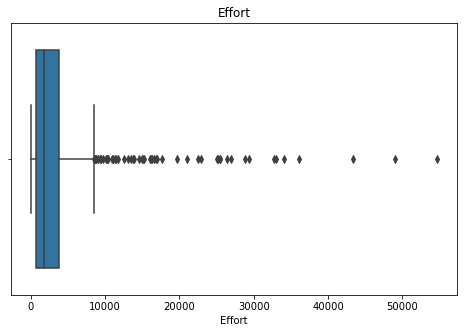

In [102]:
for i in df.columns:
    if df[i].dtypes!="object":
        warnings.filterwarnings("ignore")
        plt.figure(figsize=(8,5))
        plt.title(i)
        sns.boxplot(df[i])
        plt.show()

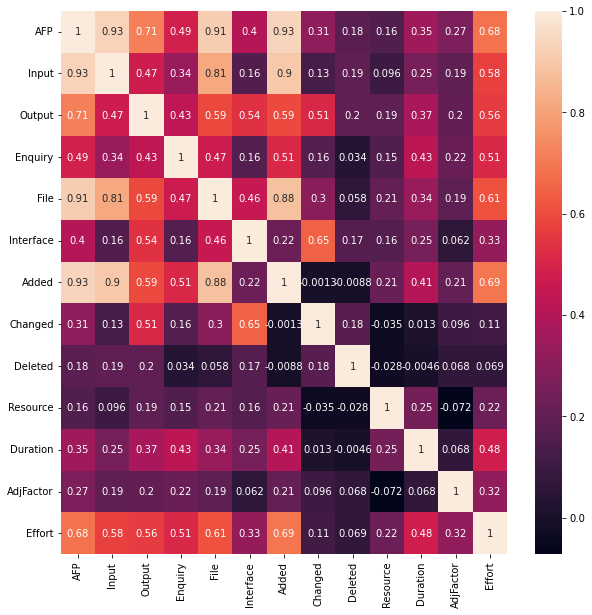

In [103]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [104]:
px.histogram(df, x="Deleted", color="Deleted")

In [105]:
px.histogram(df, x="Changed", color="Changed")

In [106]:
px.histogram(df, x="Resource", color="Resource")

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AFP        499 non-null    int64  
 1   Input      499 non-null    int64  
 2   Output     499 non-null    int64  
 3   Enquiry    499 non-null    int64  
 4   File       499 non-null    int64  
 5   Interface  499 non-null    int64  
 6   Added      499 non-null    int64  
 7   Changed    499 non-null    int64  
 8   Deleted    499 non-null    int64  
 9   Resource   499 non-null    int64  
 10  Duration   499 non-null    float64
 11  DevType    499 non-null    object 
 12  AdjFactor  499 non-null    float64
 13  Effort     499 non-null    int64  
dtypes: float64(2), int64(11), object(1)
memory usage: 54.7+ KB


In [108]:
df.drop(["Deleted", "Resource", "Changed", "Interface", "AdjFactor"], axis=True, inplace=True)
df

,AFP,Input,Output,Enquiry,File,Added,Duration,DevType,Effort
0,1587,774,260,340,128,1502,4.0,NewDev,7490
1,260,9,4,3,193,51,17.0,Maint,4150
2,152,25,33,28,42,163,9.0,NewDev,668
3,252,151,28,8,39,69,4.0,Maint,3238
4,292,93,0,194,20,0,13.0,Maint,2994
...,...,...,...,...,...,...,...,...,...
494,51,32,0,16,7,0,3.0,Maint,899
495,1106,410,267,108,152,962,20.0,NewDev,16560
496,99,13,32,3,42,95,4.0,NewDev,526
497,56,24,0,9,14,47,6.0,NewDev,440


In [109]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
df["DevType"] = label.fit_transform(df["DevType"])
df

,AFP,Input,Output,Enquiry,File,Added,Duration,DevType,Effort
0,1587,774,260,340,128,1502,4.0,1,7490
1,260,9,4,3,193,51,17.0,0,4150
2,152,25,33,28,42,163,9.0,1,668
3,252,151,28,8,39,69,4.0,0,3238
4,292,93,0,194,20,0,13.0,0,2994
...,...,...,...,...,...,...,...,...,...
494,51,32,0,16,7,0,3.0,0,899
495,1106,410,267,108,152,962,20.0,1,16560
496,99,13,32,3,42,95,4.0,1,526
497,56,24,0,9,14,47,6.0,1,440


In [110]:
px.histogram(df, x="DevType", color="DevType")

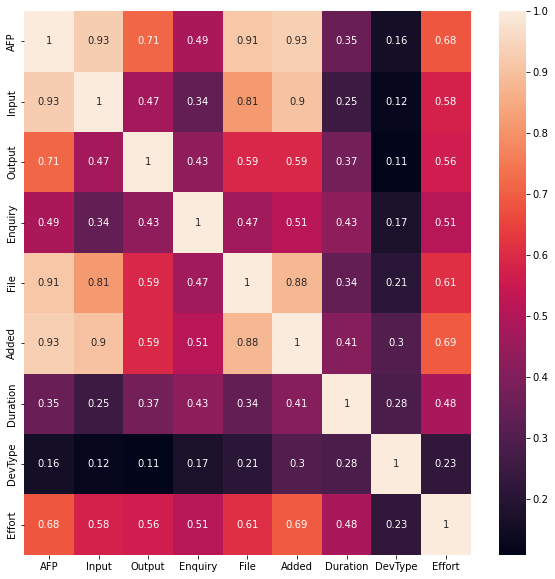

In [111]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [112]:
df.drop(["DevType"], axis=True, inplace=True)
df

,AFP,Input,Output,Enquiry,File,Added,Duration,Effort
0,1587,774,260,340,128,1502,4.0,7490
1,260,9,4,3,193,51,17.0,4150
2,152,25,33,28,42,163,9.0,668
3,252,151,28,8,39,69,4.0,3238
4,292,93,0,194,20,0,13.0,2994
...,...,...,...,...,...,...,...,...
494,51,32,0,16,7,0,3.0,899
495,1106,410,267,108,152,962,20.0,16560
496,99,13,32,3,42,95,4.0,526
497,56,24,0,9,14,47,6.0,440


<Figure size 864x864 with 0 Axes>

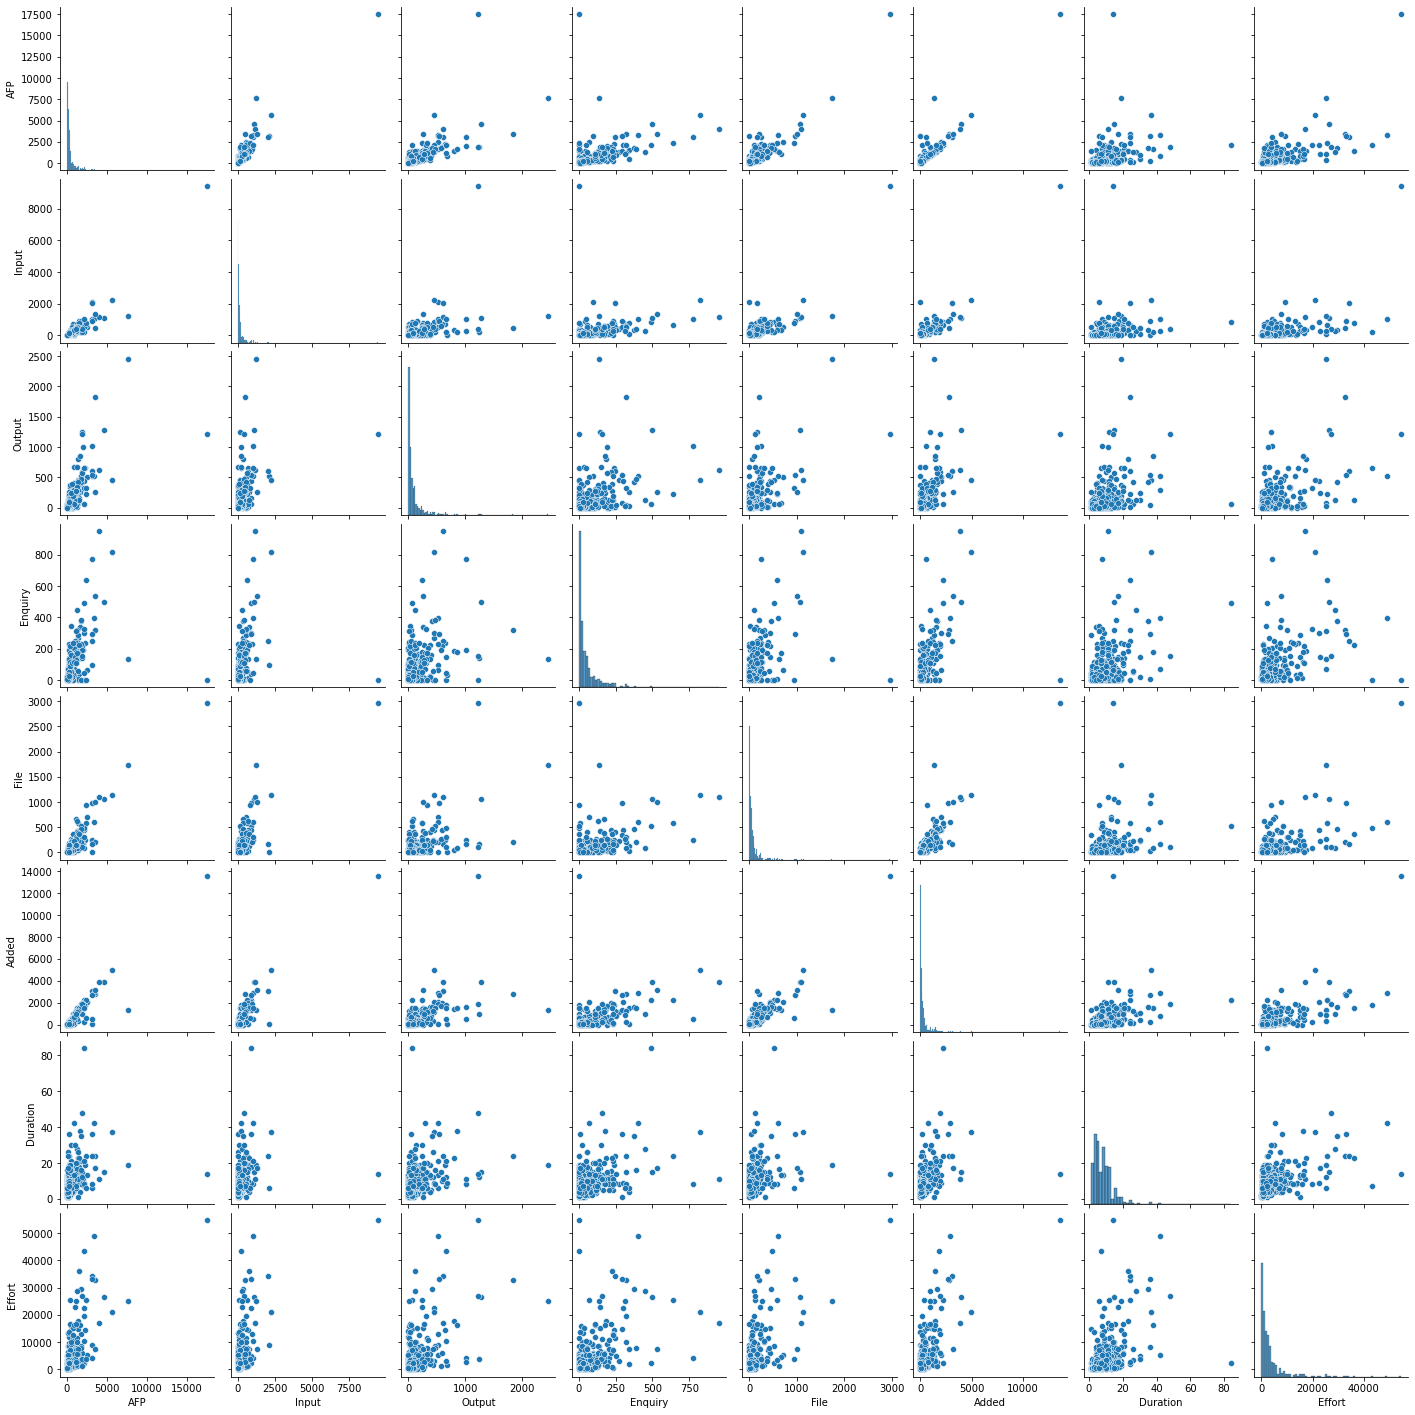

In [113]:
plt.figure(figsize=(12,12))
sns.pairplot(df)
plt.show()

In [114]:
x = df.iloc[:,:-1]
y = df.iloc[:, -1]
x_check = df.iloc[:,:-1].values
y_check = df.iloc[:, -1].values

In [115]:
x.head()

,AFP,Input,Output,Enquiry,File,Added,Duration
0,1587,774,260,340,128,1502,4.0
1,260,9,4,3,193,51,17.0
2,152,25,33,28,42,163,9.0
3,252,151,28,8,39,69,4.0
4,292,93,0,194,20,0,13.0


In [116]:
def mulcol(x):
    arr = StandardScaler().fit_transform(x)
    return pd.DataFrame([[x.columns[col], variance_inflation_factor(arr, col)] for col in range(arr.shape[1])], columns=["Features", "VIF"])

In [117]:
mulcol(x)

,Features,VIF
0,AFP,97.685959
1,Input,38.363419
2,Output,8.386041
3,Enquiry,1.964247
4,File,12.509232
5,Added,10.971042
6,Duration,1.394846


In [118]:
dt_list, lr_list, rf_list, knn_list, svm_list, xgbr_list =[], [], [], [], [], []
for i in range(1,42):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=i)
    print(f"-----------------------------Random State : {i}-------------------------------")
    print("Training data of independent col : ", x_train.shape)
    print("Training data of dependent col : ", y_train.shape)
    print("Test data of independent col : ", x_test.shape)
    print("Test data of dependent col : ", y_test.shape)
    models = {
        "LinearRegression": LinearRegression(),
        "DecisionTreeRegressor": DecisionTreeRegressor(),
        "RandomForestRegressor": RandomForestRegressor(),
        "SVM": SVR(),
        "KNN": KNeighborsRegressor(),
        "XGboost": XGBRegressor()
    }
    for name, model in models.items():
        model.fit(x_train, y_train)
        print(f"\n {name} : Train Accuracy : {model.score(x_train, y_train)} ")
        print(f" {name} : Test Accuracy : {model.score(x_test, y_test)} ")
        if name=="LinearRegression":
            lr_list.append(model.score(x_test, y_test))
        elif name=="DecisionTreeRegressor":
            dt_list.append(model.score(x_test, y_test))
        elif name=="RandomForestRegressor":
            rf_list.append(model.score(x_test, y_test))
        elif name=="SVM":
            svm_list.append(model.score(x_test, y_test))
        elif name=="KNN":
            knn_list.append(model.score(x_test, y_test))
        elif name=="XGboost":
            xgbr_list.append(model.score(x_test, y_test))
        
    print("\n\n")

-----------------------------Random State : 1-------------------------------
Training data of independent col :  (349, 7)
Training data of dependent col :  (349,)
Test data of independent col :  (150, 7)
Test data of dependent col :  (150,)

 LinearRegression : Train Accuracy : 0.5885690249618064 
 LinearRegression : Test Accuracy : 0.5425870578451439 

 DecisionTreeRegressor : Train Accuracy : 1.0 
 DecisionTreeRegressor : Test Accuracy : -0.03952694176267446 

 RandomForestRegressor : Train Accuracy : 0.916852456498614 
 RandomForestRegressor : Test Accuracy : 0.5908838664867556 

 SVM : Train Accuracy : -0.1017230710406618 
 SVM : Test Accuracy : -0.0852431939924736 

 KNN : Train Accuracy : 0.5848242078268188 
 KNN : Test Accuracy : 0.44274146714746054 

 XGboost : Train Accuracy : 0.9999971217672062 
 XGboost : Test Accuracy : 0.5031819895693997 



-----------------------------Random State : 2-------------------------------
Training data of independent col :  (349, 7)
Training da


 RandomForestRegressor : Train Accuracy : 0.905243714537449 
 RandomForestRegressor : Test Accuracy : 0.5271877214721397 

 SVM : Train Accuracy : -0.08865023098110236 
 SVM : Test Accuracy : -0.13436534224483077 

 KNN : Train Accuracy : 0.5470627326565192 
 KNN : Test Accuracy : 0.5416487288205267 

 XGboost : Train Accuracy : 0.9999941387758894 
 XGboost : Test Accuracy : 0.46326656593210946 



-----------------------------Random State : 11-------------------------------
Training data of independent col :  (349, 7)
Training data of dependent col :  (349,)
Test data of independent col :  (150, 7)
Test data of dependent col :  (150,)

 LinearRegression : Train Accuracy : 0.6267412573152578 
 LinearRegression : Test Accuracy : 0.5062383855217871 

 DecisionTreeRegressor : Train Accuracy : 1.0 
 DecisionTreeRegressor : Test Accuracy : 0.1301339905282125 

 RandomForestRegressor : Train Accuracy : 0.9255543793186708 
 RandomForestRegressor : Test Accuracy : 0.5232127716541368 

 SVM : 


 RandomForestRegressor : Train Accuracy : 0.9110340260334961 
 RandomForestRegressor : Test Accuracy : 0.7522728256453117 

 SVM : Train Accuracy : -0.10803480863472936 
 SVM : Test Accuracy : -0.09639315991349617 

 KNN : Train Accuracy : 0.522988509660731 
 KNN : Test Accuracy : 0.5417210289438392 

 XGboost : Train Accuracy : 0.9999968613721284 
 XGboost : Test Accuracy : 0.5580279035938314 



-----------------------------Random State : 21-------------------------------
Training data of independent col :  (349, 7)
Training data of dependent col :  (349,)
Test data of independent col :  (150, 7)
Test data of dependent col :  (150,)

 LinearRegression : Train Accuracy : 0.6395407299537679 
 LinearRegression : Test Accuracy : 0.2169380629055202 

 DecisionTreeRegressor : Train Accuracy : 1.0 
 DecisionTreeRegressor : Test Accuracy : -0.11996073578900557 

 RandomForestRegressor : Train Accuracy : 0.9418854267594503 
 RandomForestRegressor : Test Accuracy : 0.316657406169645 

 SVM : 


 RandomForestRegressor : Train Accuracy : 0.9118952214991075 
 RandomForestRegressor : Test Accuracy : 0.5483536254814811 

 SVM : Train Accuracy : -0.09521802953977332 
 SVM : Test Accuracy : -0.08354023161163382 

 KNN : Train Accuracy : 0.5791929409318939 
 KNN : Test Accuracy : 0.4766346432633689 

 XGboost : Train Accuracy : 0.9999979809912934 
 XGboost : Test Accuracy : 0.36534742819023547 



-----------------------------Random State : 31-------------------------------
Training data of independent col :  (349, 7)
Training data of dependent col :  (349,)
Test data of independent col :  (150, 7)
Test data of dependent col :  (150,)

 LinearRegression : Train Accuracy : 0.6840495063466643 
 LinearRegression : Test Accuracy : 0.3345477415079453 

 DecisionTreeRegressor : Train Accuracy : 1.0 
 DecisionTreeRegressor : Test Accuracy : -0.10898089842471648 

 RandomForestRegressor : Train Accuracy : 0.9329185121519434 
 RandomForestRegressor : Test Accuracy : 0.3971900301113177 

 SVM


 RandomForestRegressor : Train Accuracy : 0.9056751569161997 
 RandomForestRegressor : Test Accuracy : 0.5001863270879668 

 SVM : Train Accuracy : -0.10233612259099356 
 SVM : Test Accuracy : -0.14160928155962305 

 KNN : Train Accuracy : 0.5459675304402526 
 KNN : Test Accuracy : 0.43997683013009703 

 XGboost : Train Accuracy : 0.999997881414821 
 XGboost : Test Accuracy : 0.38693306014612683 



-----------------------------Random State : 41-------------------------------
Training data of independent col :  (349, 7)
Training data of dependent col :  (349,)
Test data of independent col :  (150, 7)
Test data of dependent col :  (150,)

 LinearRegression : Train Accuracy : 0.5706984558244652 
 LinearRegression : Test Accuracy : 0.6374817790007961 

 DecisionTreeRegressor : Train Accuracy : 1.0 
 DecisionTreeRegressor : Test Accuracy : -0.4234423320252083 

 RandomForestRegressor : Train Accuracy : 0.90347334686932 
 RandomForestRegressor : Test Accuracy : 0.550718425323993 

 SVM : T

In [119]:
max_of_lr = max(lr_list)
max_of_dt = max(dt_list)
max_of_rf = max(rf_list)
max_of_knn = max(knn_list)
max_of_svm = max(svm_list)
max_of_xgb = max(xgbr_list)
model_dataframe = pd.DataFrame({"Algo ":["LinearRegression", "DecisionTreeRegressor", "RandomForestRegressor", "SVR", "KNeighborsRegressor", "XGboost"],
              "Score ":[max_of_lr, max_of_dt, max_of_rf, max_of_svm, max_of_knn, max_of_xgb]   
             })

In [120]:
model_dataframe

,Algo,Score
0,LinearRegression,0.691282
1,DecisionTreeRegressor,0.428544
2,RandomForestRegressor,0.752273
3,SVR,-0.033145
4,KNeighborsRegressor,0.571532
5,XGboost,0.593273


In [96]:
px.histogram(model_dataframe, x="Algo ", y="Score ", color="Algo ")

In [90]:
rf_list

[0.5725032092912941,
 0.5642111098943161,
 0.34144493803406917,
 0.5151267588600782,
 0.09393166734896907,
 0.4751870151964478,
 0.4930094226431261,
 0.3028723684864262,
 0.44019161393914563,
 0.5492347957421598,
 0.5333950901047665,
 0.6615417334085572,
 0.5506057281109202,
 0.44694336883872265,
 0.45429258932470373,
 0.20534753768810532,
 0.5795755855721361,
 0.40891868462727043,
 0.2659319757884071,
 0.7450931545842401,
 0.2805280172381158,
 0.479429556816533,
 0.39982328542826817,
 0.5272445468687451,
 0.44710615212843285,
 0.40973965211339325,
 0.5720989919892057,
 0.6120674146555178,
 0.49400865150310314,
 0.5633621874378836,
 0.4150824555093149,
 0.5234157840460476,
 -0.26023480614062433,
 0.39510097161024094,
 0.619488030031173,
 0.3378662831226168,
 0.6226095149288493,
 0.4676556741578216,
 0.4346086084769646,
 0.48510761385167334,
 0.5252660415819629]

### Let's try some hyperparameter tuning in Decision Tree

In [25]:
dt_model = DecisionTreeRegressor()
dt_model.fit(x_train, y_train)
print("Training Score : ", dt_model.score(x_train, y_train))
print("Test Score : ", dt_model.score(x_test, y_test))

Training Score :  1.0
Test Score :  0.3597188802555864


In [26]:
path = dt_model.cost_complexity_pruning_path(x_train, y_train)

In [27]:
path

{'ccp_alphas': array([0.00000000e+00, 1.43266476e-03, 1.43266476e-03, 5.73065903e-03,
        1.28939828e-02, 1.28939828e-02, 2.29226361e-02, 3.58166189e-02,
        5.15759312e-02, 5.15759312e-02, 9.16905444e-02, 1.73352436e-01,
        1.73352436e-01, 1.73352436e-01, 2.80802292e-01, 2.80802292e-01,
        2.80802292e-01, 3.22349570e-01, 3.66762178e-01, 3.66762178e-01,
        3.66762178e-01, 6.31805158e-01, 6.53772684e-01, 8.25214900e-01,
        8.95415473e-01, 9.68481375e-01, 9.68481375e-01, 1.04441261e+00,
        1.37679083e+00, 1.37679083e+00, 1.37679083e+00, 1.71919771e+00,
        1.85673352e+00, 2.06876791e+00, 2.29226361e+00, 2.47564470e+00,
        2.64899713e+00, 2.75835721e+00, 2.77363897e+00, 3.16475645e+00,
        3.69818529e+00, 4.13037249e+00, 4.49283668e+00, 4.49283668e+00,
        4.81948424e+00, 4.98710602e+00, 5.26504298e+00, 5.30109838e+00,
        5.68624642e+00, 6.82091691e+00, 7.84527221e+00, 9.39971347e+00,
        1.03510029e+01, 1.14740688e+01, 1.29297994

In [28]:
ccp_alphas = path.ccp_alphas

Text(0, 0.5, 'score')

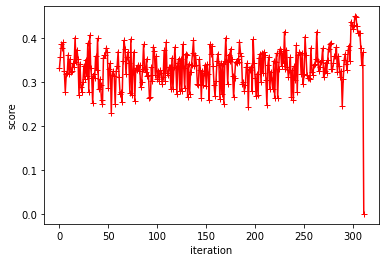

In [29]:
dt_ccp_apha=[]
score=[]
for ccp in ccp_alphas:
    dt_m = DecisionTreeRegressor(ccp_alpha=ccp)
    dt_m.fit(x_train, y_train)
    dt_ccp_apha.append(dt_m)
    score.append(dt_m.score(x_test, y_test))
plt.plot(score, 'r-+')
plt.xlabel('iteration')
plt.ylabel('score')

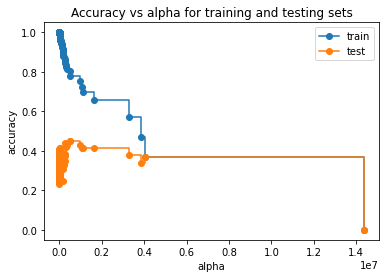

In [30]:
training_accuracy = [i.score(x_train, y_train) for i in dt_ccp_apha]
test_accuracy = [i.score(x_test, y_test) for i in dt_ccp_apha]
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, training_accuracy, marker='o', label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_accuracy, marker='o', label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [31]:
grid_param = {
    "criterion" : ['squared_error', 'entropy'],
    "splitter" : ['best', 'random'],
    "max_depth" : range(2, 40, 1),
    "min_samples_split" : range(2,10,1),
    "min_samples_leaf" : range(1, 10, 1),
}

In [32]:
grid_cct = GridSearchCV(estimator=dt_model, param_grid=grid_param, cv=5, n_jobs=-1, verbose=3)
grid_cct.fit(x_train, y_train)

Fitting 5 folds for each of 10944 candidates, totalling 54720 fits


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'criterion': ['squared_error', 'entropy'],
                         'max_depth': range(2, 40),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10),
                         'splitter': ['best', 'random']},
             verbose=3)

In [33]:
grid_cct.best_params_

{'criterion': 'squared_error',
 'max_depth': 36,
 'min_samples_leaf': 5,
 'min_samples_split': 6,
 'splitter': 'random'}

In [34]:
final_dt = DecisionTreeRegressor(**grid_cct.best_params_)
final_dt.fit(x_train,y_train)
print("Training Score : ", final_dt.score(x_train, y_train))
print("Test Score : ", final_dt.score(x_test, y_test))

Training Score :  0.0
Test Score :  -0.0005770074588613561


### Let's Try with RandomForest

In [122]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=20)
rfr = RandomForestRegressor()
rfr.fit(x_train, y_train)
print("Training Score : ", rfr.score(x_train, y_train))
print("Test Score : ", rfr.score(x_test, y_test))

Training Score :  0.9010005586569677
Test Score :  0.8201205809451546


<AxesSubplot:xlabel='Effort', ylabel='Density'>

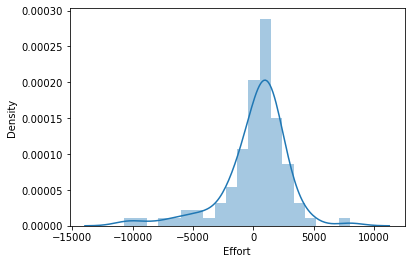

In [123]:
y_pred = rfr.predict(x_test)
warnings.filterwarnings("ignore")
sns.distplot(y_pred-y_test)

In [127]:
error = {
    "Error_Type": ["Mean Absolute Error ","Root Mean Square Error ","Mean Square Log Error ", "R2_score"],
    "Value": [mean_absolute_error(y_test, y_pred),np.sqrt(mean_squared_error(y_test, y_pred)),mean_squared_log_error(y_test, y_pred), r2_score(y_test, y_pred)]
}
error_df = pd.DataFrame(error)

In [128]:
error_df

,Error_Type,Value
0,Mean Absolute Error,1889.950100
1,Root Mean Square Error,2722.769447
2,Mean Square Log Error,1.150425
3,R2_score,0.820121


In [126]:
px.histogram(error_df, x="Error_Type", y="Value", color="Error_Type")

In [48]:
rfr.estimators_[0]

DecisionTreeRegressor(max_features='auto', random_state=1849165483)

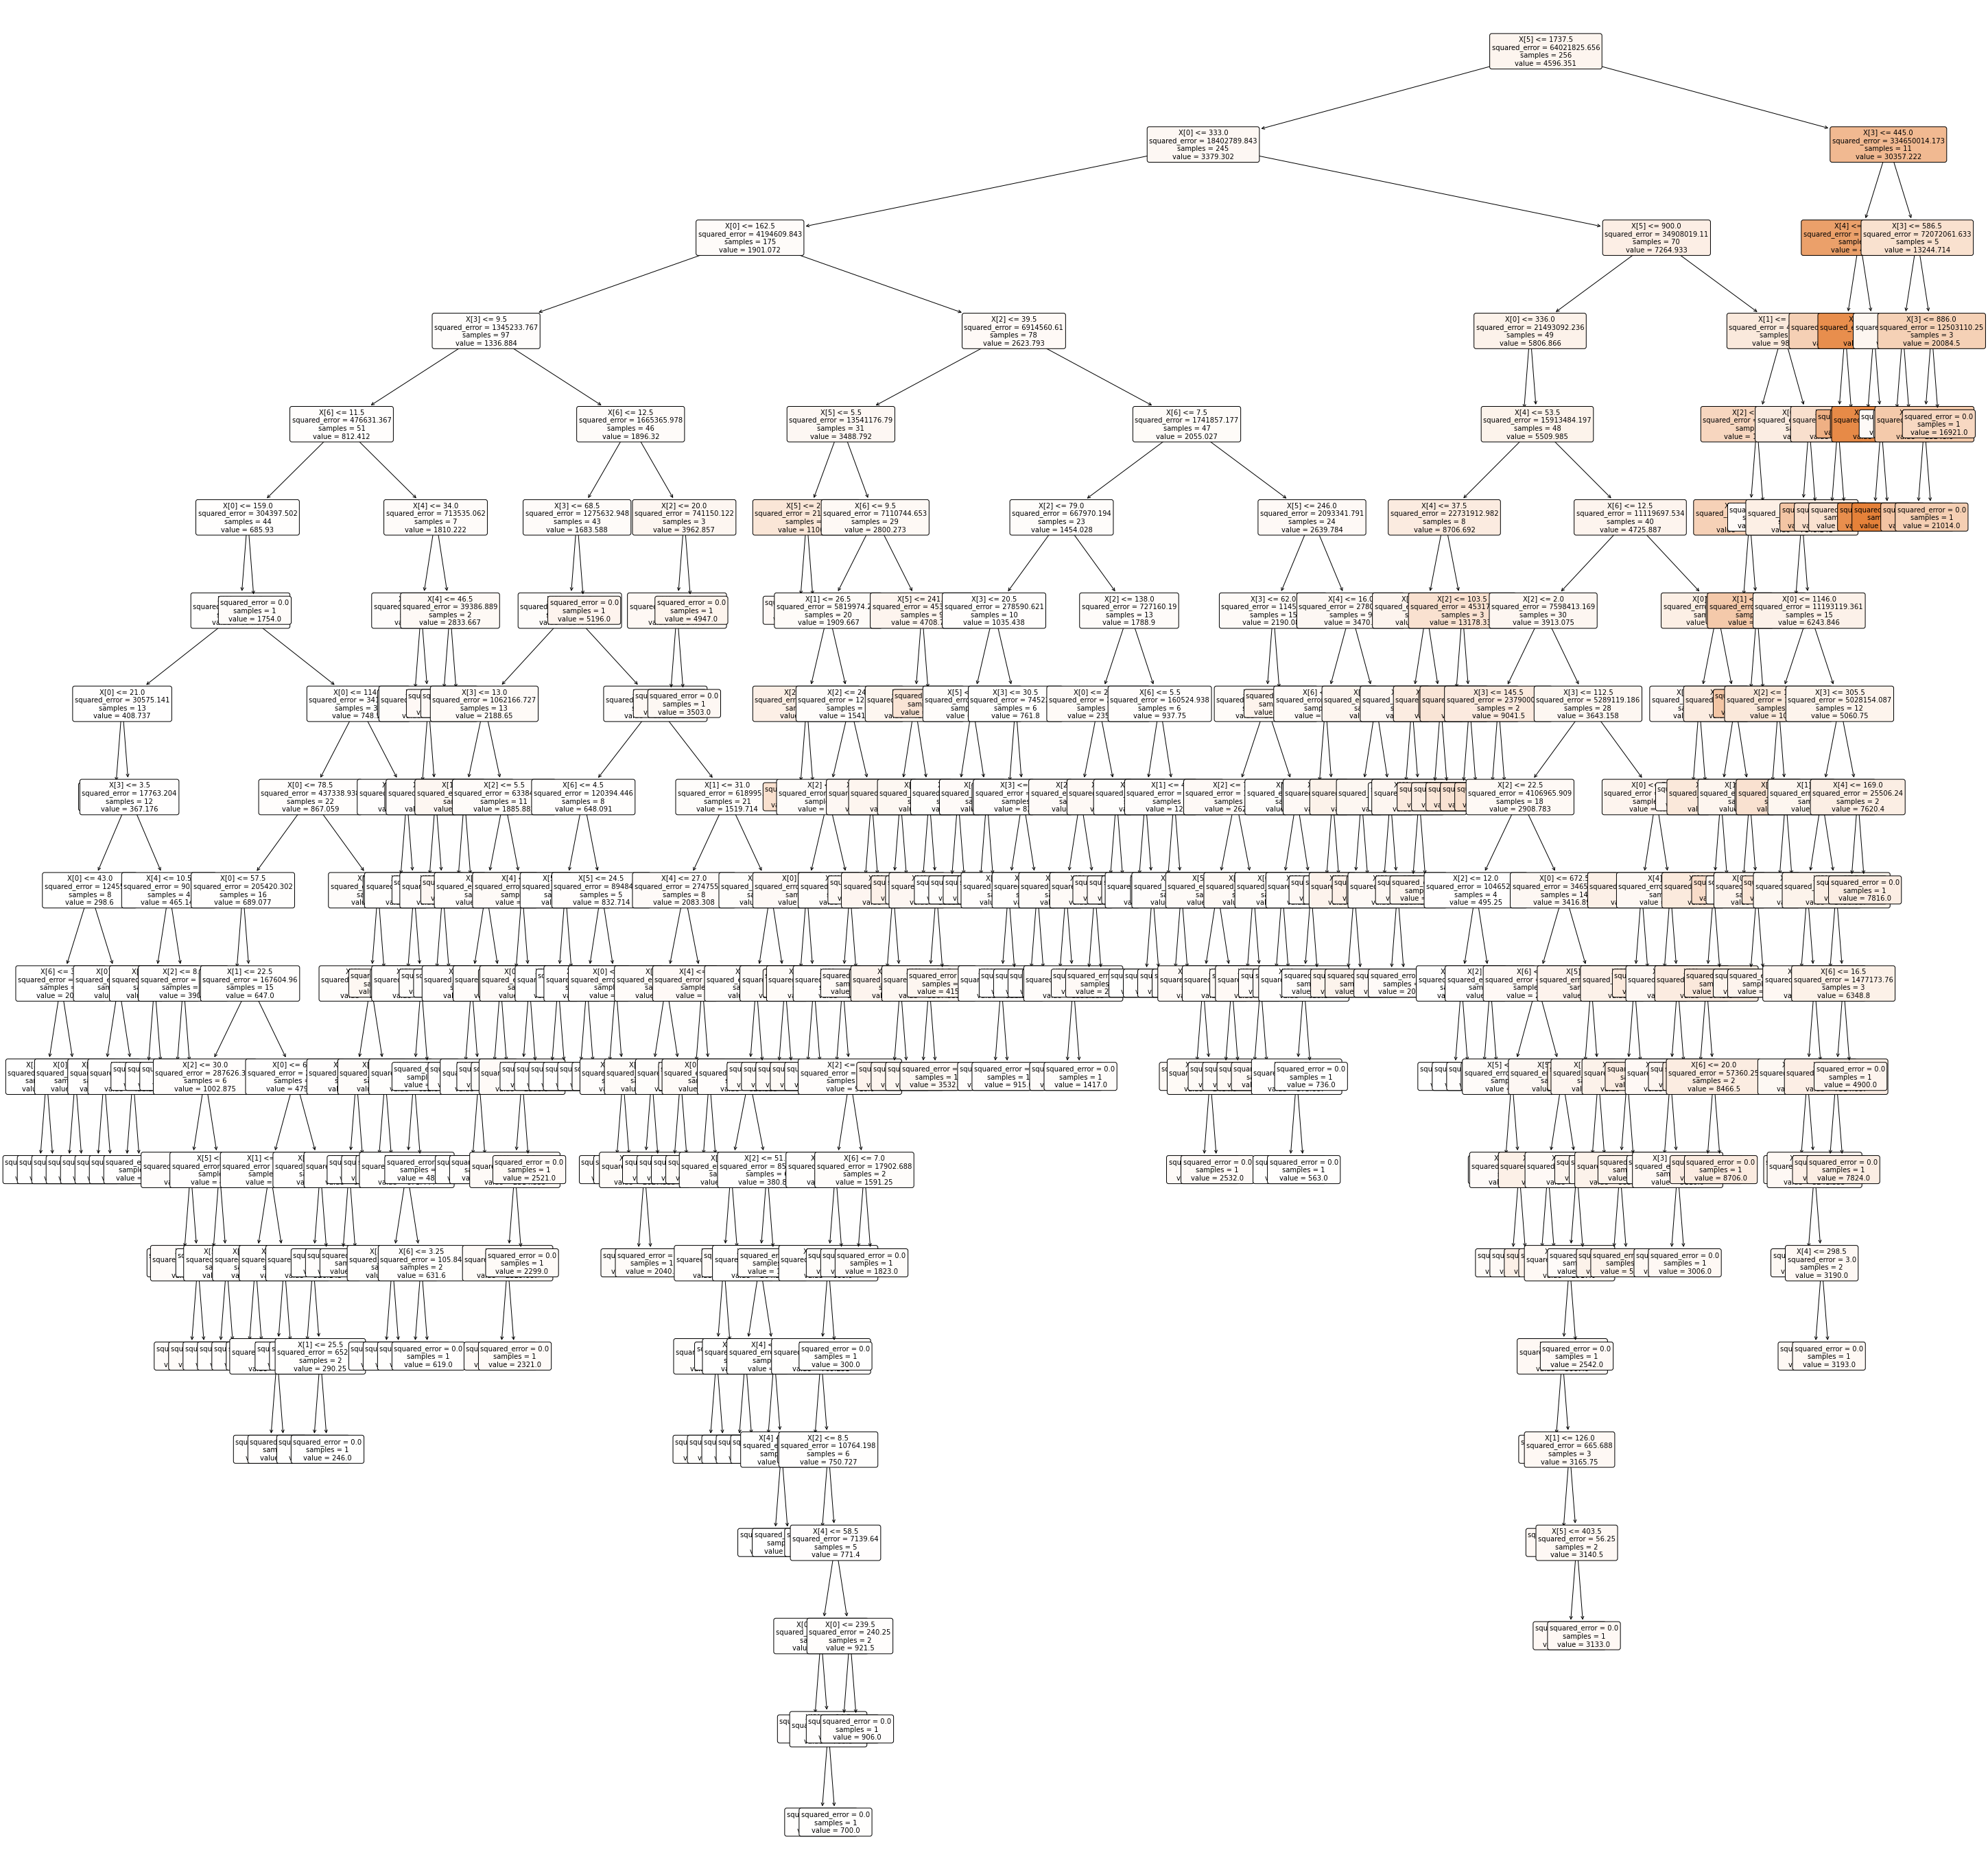

In [68]:
plt.figure(figsize=(50,50))
plot_tree(rfr.estimators_[0], filled=True, impurity=True, rounded=True, fontsize=10 )
plt.show()

In [8]:
#filename = "RandomForestRegression_model.sav"
#pickle.dump(rfr, open(filename, 'wb'))

In [15]:
param_grid={'criterion': ["squared_error", "absolute_error", "poisson", 'entropy'],
            'max_depth': range(2, 20),
            'max_features': ['auto', 'log2'],
            'min_samples_leaf': range(1, 10),
            'min_samples_split': range(2, 10),
            'n_estimators': [90, 100, 115, 130]}

In [ ]:
grid_rfr = GridSearchCV(estimator=rfr, param_grid=param_grid, cv=5, n_jobs=-1, verbose=3)
grid_rfr.fit(x_train, y_train)

In [38]:
grid_rfr.best_params_

{'criterion': 'absolute_error',
 'max_features': 'log2',
 'min_samples_leaf': 2,
 'min_samples_split': 4,
 'n_estimators': 90}

In [39]:
rfr_final = RandomForestRegressor(**grid_rfr.best_params_)
rfr_final.fit(x_train, y_train)
print("Training Score : ", rfr_final.score(x_train, y_train))
print("Test Score : ", rfr_final.score(x_test, y_test))

Training Score :  0.7956614985645556
Test Score :  0.5187273853393466


neg_mean_absolute_error -2596.493291020409   458.692913124638
neg_mean_squared_error -23749997.660031576   12191439.20659003
r2 0.3495707435078423   0.295313312200353


In [20]:
result

[array([-2150.1488    , -3050.5502    , -2915.0284    , -2295.4642    ,
        -3294.551     , -1937.7536    , -2511.0652    , -2907.7306    ,
        -2885.0276    , -1896.74673469]),
 array([-13006968.820196  , -42266162.59826   , -29176862.35456   ,
        -12200628.663776  , -32527217.804836  , -10818666.719762  ,
        -27279426.997588  , -40328404.480068  , -17147466.26665   ,
        -10296067.35773673]),
 array([ 0.26644333,  0.15399991,  0.61715844,  0.67647628,  0.07671009,
        -0.37096413,  0.38691885,  0.46950401,  0.42489655,  0.74523202])]

## Let's try Linear Regression again
#### Now let's first handle the outliers 

In [47]:
df_new=df

In [48]:
df_new

,AFP,Input,Output,Enquiry,File,Added,Duration,Effort
0,1587,774,260,340,128,1502,4.0,7490
1,260,9,4,3,193,51,17.0,4150
2,152,25,33,28,42,163,9.0,668
3,252,151,28,8,39,69,4.0,3238
4,292,93,0,194,20,0,13.0,2994
...,...,...,...,...,...,...,...,...
494,51,32,0,16,7,0,3.0,899
495,1106,410,267,108,152,962,20.0,16560
496,99,13,32,3,42,95,4.0,526
497,56,24,0,9,14,47,6.0,440


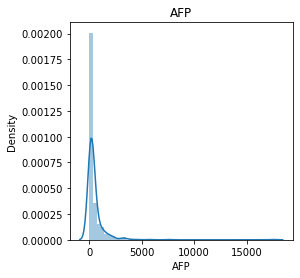

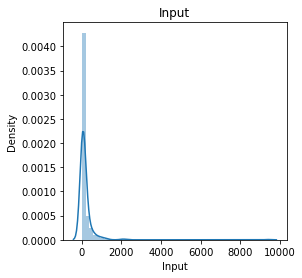

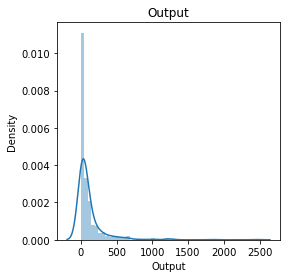

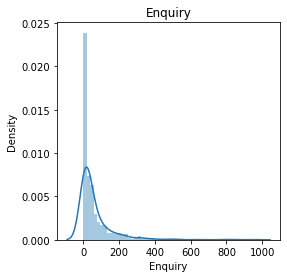

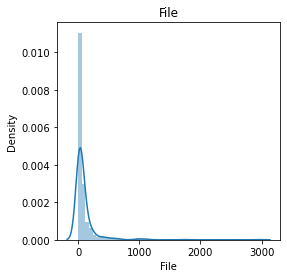

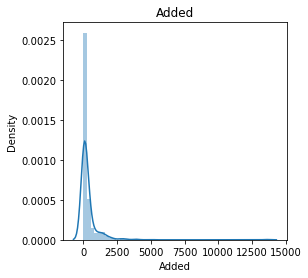

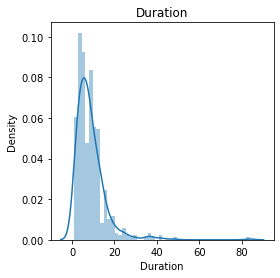

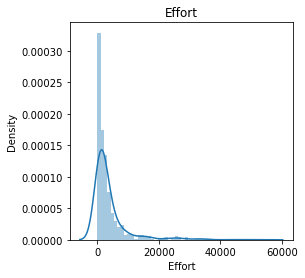

In [49]:
for i in df_new.columns:
    warnings.filterwarnings("ignore")
    plt.figure(figsize=(4,4))
    plt.title(i)
    sns.distplot(df[i])
    plt.show()

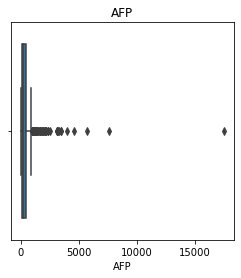

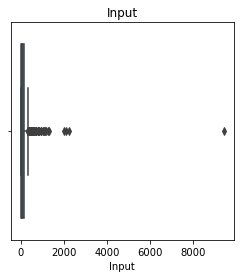

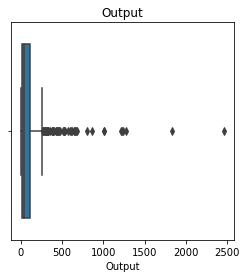

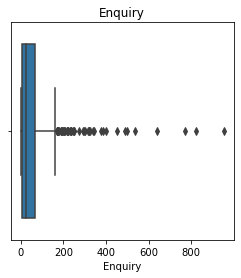

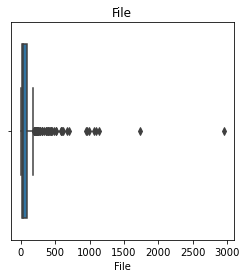

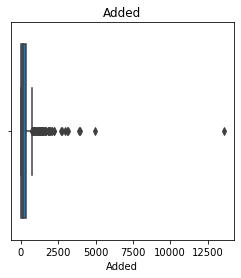

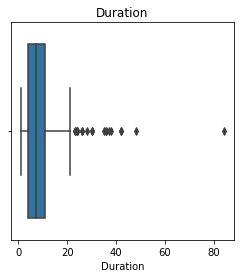

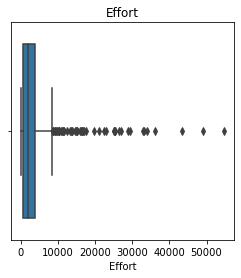

In [50]:
for i in df_new.columns:
    warnings.filterwarnings("ignore")
    plt.figure(figsize=(4,4))
    plt.title(i)
    sns.boxplot(df[i])
    plt.show()

In [51]:
for i in df_new.columns:
    upper_boundary = df_new[i].mean()  + 3*df_new[i].std()
    lower_boundary = df_new[i].mean()  - 3*df_new[i].std()
    print(f"For column : {i} upper boundary {upper_boundary}, lower boundary {lower_boundary}")
    IQR = df_new[i].quantile(0.75) - df[i].quantile(0.25)
    lower_bridge = df_new[i].quantile(0.25) - (IQR*1.5)
    upper_bridge = df_new[i].quantile(0.75) + (IQR*1.5)
    print(f" Range of columns : {i} is from {lower_bridge} to {upper_bridge} rest are outliers !")
    df_new.loc[df_new[i] >= upper_bridge] = upper_bridge

For column : AFP upper boundary 3664.3720226923924, lower boundary -2690.6565918306687
 Range of columns : AFP is from -405.0 to 943.0 rest are outliers !
For column : Input upper boundary 1076.3407674594318, lower boundary -704.0602063371874
 Range of columns : Input is from -161.25 to 340.75 rest are outliers !
For column : Output upper boundary 462.1633114046991, lower boundary -263.31261000189346
 Range of columns : Output is from -154.0 to 294.0 rest are outliers !
For column : Enquiry upper boundary 389.1931221641448, lower boundary -236.10694981945542
 Range of columns : Enquiry is from -118.5 to 213.5 rest are outliers !
For column : File upper boundary 305.7322809477719, lower boundary -162.6781727313391
 Range of columns : File is from -122.5 to 241.5 rest are outliers !
For column : Added upper boundary 559.7139604402382, lower boundary -249.1528381957492
 Range of columns : Added is from -221.5 to 474.5 rest are outliers !
For column : Duration upper boundary 380.9487410314

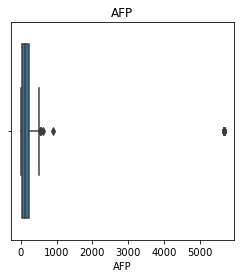

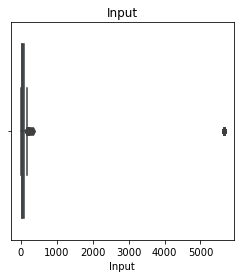

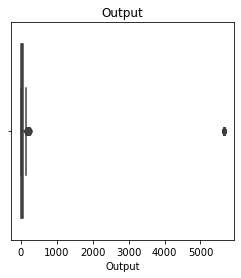

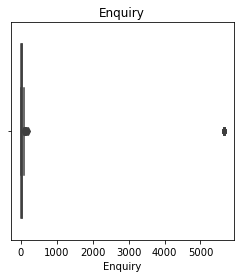

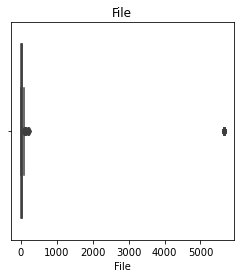

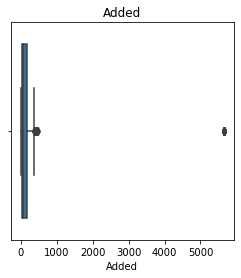

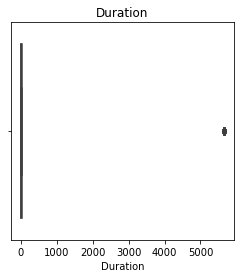

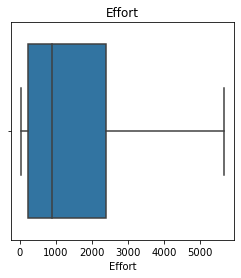

In [52]:
for i in df_new.columns:
    warnings.filterwarnings("ignore")
    plt.figure(figsize=(4,4))
    plt.title(i)
    sns.boxplot(df_new[i])
    plt.show()

In [53]:
df_new

,AFP,Input,Output,Enquiry,File,Added,Duration,Effort
0,31.5,31.5,31.5,31.5,31.5,31.5,31.5,31.5
1,260.0,9.0,4.0,3.0,193.0,51.0,17.0,4150.0
2,152.0,25.0,33.0,28.0,42.0,163.0,9.0,668.0
3,252.0,151.0,28.0,8.0,39.0,69.0,4.0,3238.0
4,292.0,93.0,0.0,194.0,20.0,0.0,13.0,2994.0
...,...,...,...,...,...,...,...,...
494,51.0,32.0,0.0,16.0,7.0,0.0,3.0,899.0
495,31.5,31.5,31.5,31.5,31.5,31.5,31.5,31.5
496,99.0,13.0,32.0,3.0,42.0,95.0,4.0,526.0
497,56.0,24.0,0.0,9.0,14.0,47.0,6.0,440.0


In [54]:
df_new.describe()

,AFP,Input,Output,Enquiry,File,Added,Duration,Effort
count,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000
mean,466.405812,379.453908,368.582164,353.970942,359.900802,419.427856,339.822445,1517.155311
std,1294.326420,1311.082732,1313.573692,1316.732133,1315.382602,1304.267689,1320.037225,1651.210752
min,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,26.000000
25%,52.000000,28.000000,14.500000,6.000000,14.000000,31.500000,4.000000,216.000000
50%,115.000000,32.000000,31.500000,30.000000,31.500000,52.000000,8.000000,893.000000
75%,244.500000,83.000000,65.500000,39.000000,45.000000,169.000000,31.500000,2389.000000
max,5648.500000,5648.500000,5648.500000,5648.500000,5648.500000,5648.500000,5648.500000,5648.500000


In [55]:
x_new = df_new.iloc[:,:-1]
y_new = df_new.iloc[:, -1]

In [56]:
lr_list_scaled=[]
for i in range(1, 42):
    print(f"-----------------------Random State {i}---------------------------")
    x_train, x_test, y_train, y_test = train_test_split(x_new, y_new, test_size=0.30, random_state=i)
    print("Training data of independent col : ", x_train.shape)
    print("Training data of dependent col : ", y_train.shape)
    print("Test data of independent col : ", x_test.shape)
    print("Test data of dependent col : ", y_test.shape)
    lr = LinearRegression()
    lr.fit(x_train, y_train)
    print("Training Score : ", lr.score(x_train, y_train))
    print("Test Score : ", lr.score(x_test, y_test))
    lr_list_scaled.append(lr.score(x_test, y_test))
    print("\n\n\n")

-----------------------Random State 1---------------------------
Training data of independent col :  (349, 7)
Training data of dependent col :  (349,)
Test data of independent col :  (150, 7)
Test data of dependent col :  (150,)
Training Score :  0.6389332274754874
Test Score :  0.5063569738779425




-----------------------Random State 2---------------------------
Training data of independent col :  (349, 7)
Training data of dependent col :  (349,)
Test data of independent col :  (150, 7)
Test data of dependent col :  (150,)
Training Score :  0.5908016914963405
Test Score :  0.6391388226693968




-----------------------Random State 3---------------------------
Training data of independent col :  (349, 7)
Training data of dependent col :  (349,)
Test data of independent col :  (150, 7)
Test data of dependent col :  (150,)
Training Score :  0.6022141822288731
Test Score :  0.6235021161272198




-----------------------Random State 4---------------------------
Training data of independe

In [59]:
max(lr_list_scaled)

0.7118258568546747

In [57]:
x_train.head()

,AFP,Input,Output,Enquiry,File,Added,Duration
373,31.5,31.5,31.5,31.5,31.5,31.5,31.5
64,31.5,31.5,31.5,31.5,31.5,31.5,31.5
265,211.0,73.0,32.0,79.0,22.0,111.0,13.0
428,426.0,127.0,122.0,54.0,87.0,31.0,2.0
58,160.0,0.0,21.0,72.0,25.0,74.0,2.0


<AxesSubplot:xlabel='Effort', ylabel='Density'>

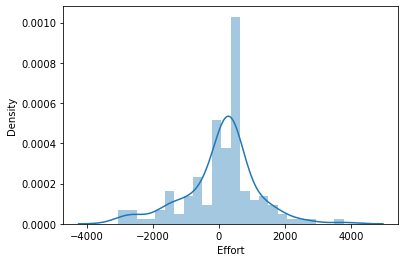

In [58]:
y_pred = lr.predict(x_test)
sns.distplot(y_pred-y_test)

In [1]:
for i, feature in enumerate(x.columns):
    plt.figure(figsize=(18, 6))
    
    dt_xs, dt_ys = zip(*sorted(zip(x_test[feature], final_dt.fit(x_train, y_train).predict(x_test))))
    model_xs, model_ys = zip(*sorted(zip(x_test[feature], lr.fit(x_train, y_train).predict(x_test))))
    rf_xs, rf_ys = zip(*sorted(zip(x_test[feature], rfr_final.fit(x_train, y_train).predict(x_test))))
    
    
    plt.scatter(x_test[feature], y_test, label="Real Datax", linewidth=3, color="black")
    plt.plot(model_xs, model_ys, label="Linear Regression Model", linewidth=3, color="red")
    plt.plot(rf_xs, rf_ys, label="Random Forest Regression", linewidth=3, color="blue")
    plt.plot(dt_xs, dt_ys, label="Decision Tree", linewidth=3, color="yellow")
    
    

    plt.xlabel(feature)
    plt.ylabel('Effort')
    plt.legend()
    plt.show()

NameError: name 'x' is not defined

In [58]:
x_train.shape

(349, 7)

In [59]:
y_train.shape

(349,)

In [60]:
df_new

,AFP,Input,Output,Enquiry,File,Added,Duration,Effort
0,31.5,31.5,31.5,31.5,31.5,31.5,31.5,31.5
1,260.0,9.0,4.0,3.0,193.0,51.0,17.0,4150.0
2,152.0,25.0,33.0,28.0,42.0,163.0,9.0,668.0
3,252.0,151.0,28.0,8.0,39.0,69.0,4.0,3238.0
4,292.0,93.0,0.0,194.0,20.0,0.0,13.0,2994.0
...,...,...,...,...,...,...,...,...
494,51.0,32.0,0.0,16.0,7.0,0.0,3.0,899.0
495,31.5,31.5,31.5,31.5,31.5,31.5,31.5,31.5
496,99.0,13.0,32.0,3.0,42.0,95.0,4.0,526.0
497,56.0,24.0,0.0,9.0,14.0,47.0,6.0,440.0
